# Ultra-Marathon Running Data Cleaning and EDA Project

In [4]:
# Importing libraries and reading data
import pandas as pd
import seaborn as sns

In [6]:
# Read the dataset
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_9328\380190031.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


In [7]:
# Display dataset information
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [8]:
df.shape

(7461195, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


# Data Cleaning

# Filter dataset to keep only:
 - Races with distances of 50K, 50km, 50Km, or 50mi
 - Races from the year 2020
 - Races in the USA

In [16]:
# Display races that are exactly 50 miles
df[ df['Event distance/length'] == '50mi' ].head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59


In [18]:
# Display races that contain '(USA)' in the event name
df[ df['Event name'].str.contains('(USA)', regex=False) ].head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59


In [20]:
# Filter dataset 
df2 = df[ (df['Event distance/length'].isin(['50K', '50km', '50Km', '50mi'])) 
                                & (df['Year of event'] == 2020) 
                                & (df['Event name'].str.contains('(USA)', regex=False)) ]
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [21]:
df2.shape

(26524, 13)

In [22]:
# Remove '(USA)' from event names for standardization
df2 = df2.copy()
df2['Event name'] = df2['Event name'].str.split('(').str.get(0)
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [26]:
# Cleaning up athlete age
df2['athlete_age'] = 2020 - df2['Athlete year of birth']
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


In [28]:
# Removing 'h' from athlete performance
df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


In [30]:
# standardizing the 'Event distance/length' column's values of: 50K or 50Km to 50km
df2['Event distance/length'] = df2['Event distance/length'].replace({'50K':'50km', '50Km':'50km'})

In [32]:
# Check if any '50Km' values remain
df2.query("`Event distance/length` == '50Km'")

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age


In [34]:
# Dropping unnecessary colmns: Athlete club, Athlete country, Athlete year of birth, Athlete age category
df2 = df2.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis=1)
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [97]:
# Cleaning up null values

In [37]:
df2.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
athlete_age                  235
dtype: int64

In [39]:
# Rows where 'Event dates' is missing
df2[df2['Event dates'].isna() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


In [41]:
# Rows where 'athlete_age' is missing
df2[df2['athlete_age'].isna() == True].head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km,50km,57,6:10:30,M,8.097,811923,NaN
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,4:46:34,M,10.469,812656,NaN
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:08:36,M,9.721,812657,NaN
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:54:04,F,8.473,658221,NaN
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,6:07:11,M,8.17,812660,NaN


In [43]:
df2.shape

(26524, 10)

In [45]:
# Dropping rows with missing values
df2 = df2.dropna()
df2.shape

(26289, 10)

In [47]:
# Checking for duplicates
df2[df2.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


In [49]:
# Reset index
df2 = df2.reset_index(drop=True)

In [51]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [94]:
# Fixing Data Types

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26289 entries, 0 to 26288
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year of event              26289 non-null  int64  
 1   Event dates                26289 non-null  object 
 2   Event name                 26289 non-null  object 
 3   Event distance/length      26289 non-null  object 
 4   Event number of finishers  26289 non-null  int64  
 5   Athlete performance        26289 non-null  object 
 6   Athlete gender             26289 non-null  object 
 7   Athlete average speed      26289 non-null  object 
 8   Athlete ID                 26289 non-null  int64  
 9   athlete_age                26289 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 2.0+ MB


In [56]:
# Converting columns to appropriate data types
df2['athlete_age'] = df2['athlete_age'].astype(int)
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)
df2['Athlete ID'] = df2['Athlete ID'].astype(object)
df2['Event number of finishers'] = df2['Event number of finishers'].astype(int)
df2['Year of event'] = df2['Year of event'].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26289 entries, 0 to 26288
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year of event              26289 non-null  int32  
 1   Event dates                26289 non-null  object 
 2   Event name                 26289 non-null  object 
 3   Event distance/length      26289 non-null  object 
 4   Event number of finishers  26289 non-null  int32  
 5   Athlete performance        26289 non-null  object 
 6   Athlete gender             26289 non-null  object 
 7   Athlete average speed      26289 non-null  float64
 8   Athlete ID                 26289 non-null  object 
 9   athlete_age                26289 non-null  int32  
dtypes: float64(1), int32(3), object(6)
memory usage: 1.7+ MB


In [58]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [60]:
# Renaming columns for clarity

df2 = df2.rename(columns={
    'Year of event': 'year',
    'Event dates': 'race_day',
    'Event name': 'race_name',
    'Event distance/length': 'race_length',
    'Event number of finishers': 'race_number_of_finishers',
    'Athlete performance': 'athlete_performance',
    'Athlete gender': 'athlete_gender',
    'Athlete average speed': 'athlete_average_speed',
    'Athlete ID': 'athlete_id'
})

df2.head()

,year,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [62]:
# Select & Order relevant columns for analysis
df3 = df2[['race_day', 'race_name', 'race_length', 'race_number_of_finishers', 'athlete_id', 'athlete_gender', 'athlete_age', 'athlete_performance', 'athlete_average_speed']]
df3.head()

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
0,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158
1,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369
2,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099
3,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449
4,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212


# Data Visualization

<Axes: xlabel='race_length', ylabel='Count'>

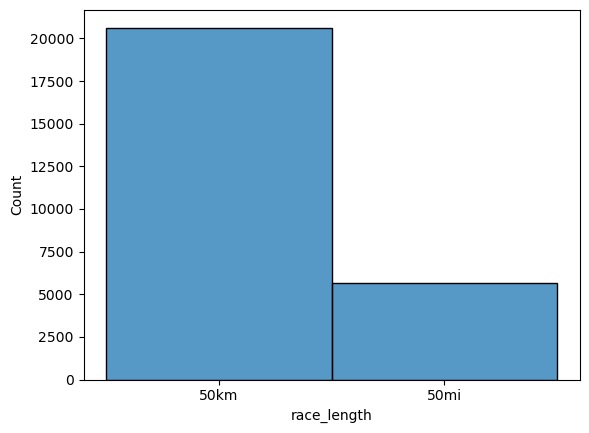

In [65]:
# Histogram of race lengths
sns.histplot(df3['race_length'])

<Axes: xlabel='race_length', ylabel='Count'>

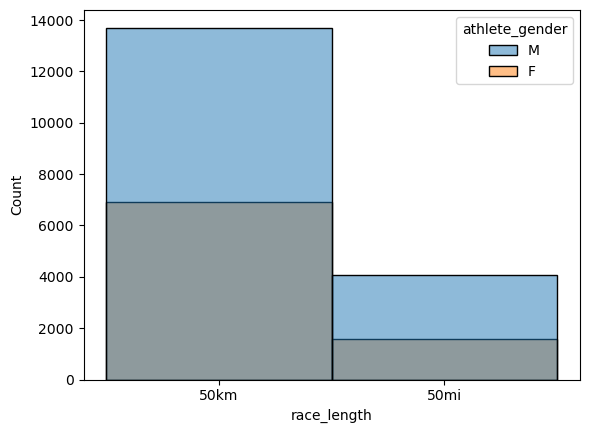

In [67]:
# Histogram of race lengths, categorized by athlete gender
sns.histplot(df3, x='race_length', hue='athlete_gender')

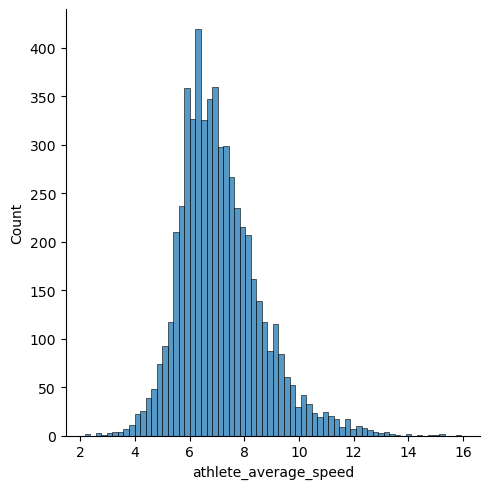

In [69]:
# Distribution plot of athlete average speed for 50mi races
sns.displot(df3[df3['race_length'] == '50mi']['athlete_average_speed'])

<Axes: xlabel='race_length', ylabel='athlete_average_speed'>

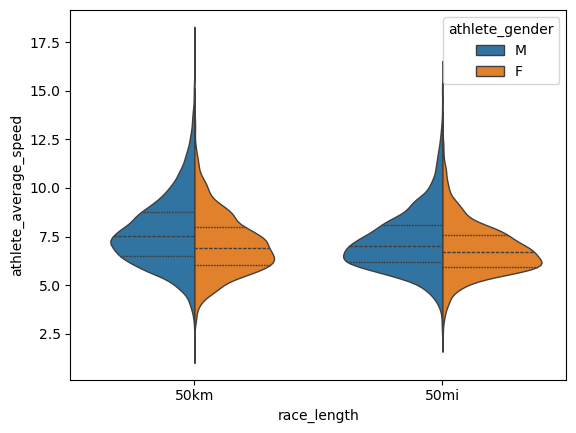

In [71]:
# Violin plot of athlete average speed by race length and gender
sns.violinplot(df3, x='race_length', y='athlete_average_speed', hue='athlete_gender', split=True, inner='quart', linewidth=1)

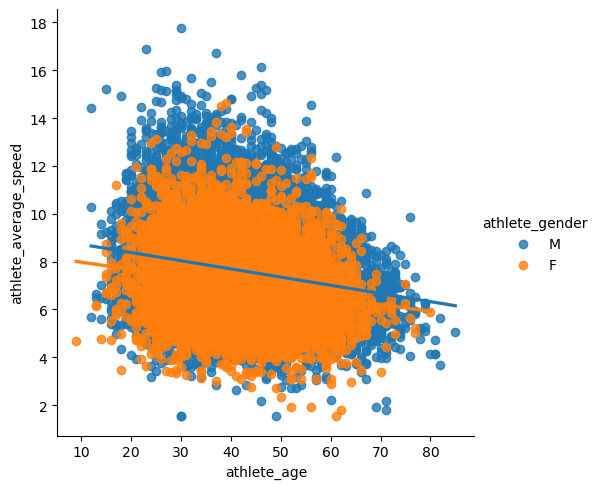

In [73]:
# Linear regression plot of athlete age vs. average speed, categorized by gender
sns.lmplot(df3, x='athlete_age', y='athlete_average_speed', hue='athlete_gender')

# Analyzing Data Trends

In [76]:
# Compare speed differences between male and female runners for 50km and 50mi races
df3.groupby(['race_length', 'athlete_gender'])['athlete_average_speed'].mean()

race_length  athlete_gender
50km         F                 7.092015
             M                 7.743376
50mi         F                 6.830764
             M                 7.249766
Name: athlete_average_speed, dtype: float64

In [78]:
# Identify top-performing age groups in 50mi races with at least 20 participants
df3.query("race_length == '50mi'").groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False).query("count > 19").head(15)

,mean,count
athlete_age,,
29,7.895574,136
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.471053,95
31,7.440842,139
38,7.420884,232
35,7.414633,196
36,7.394645,186


In [80]:
# Identify the slowest age groups in 50mi races with at least 10 participants
df3.query("race_length == '50mi'").groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=True).query("count > 9").head(20)

,mean,count
athlete_age,,
70,5.470667,12
65,5.934786,14
68,5.957500,10
67,6.114909,11
66,6.194300,10
60,6.227206,34
62,6.267564,39
61,6.358355,31
63,6.514806,31


# Seasonal Analysis: 
## Extract month from race day and classify seasons

- spring 3-5
- summer 6-8
- fall 9-11
- winter 12-2



In [82]:
df3.head()

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
0,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158
1,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369
2,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099
3,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449
4,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212


In [84]:
df3['race_month'] = df3['race_day'].str.split('.').str.get(1).astype(int)

In [86]:
df3['race_season'] = df3['race_month'].apply(lambda x: 'Winter' if x > 11 else 'Fall' if x > 8 else 'Summer' if x > 5 else 'Spring' if x > 2 else 'Winter')

In [88]:
df3.head()

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed,race_month,race_season
0,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158,2,Winter
1,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369,2,Winter
2,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099,2,Winter
3,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449,2,Winter
4,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212,2,Winter


In [90]:
df3.groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
race_season,,
Spring,7.703542,3385
Winter,7.524506,11825
Fall,7.406619,8315
Summer,6.859274,2764
